TensorFlow version: 2.19.0


Saving kaggle.json to kaggle (3).json
Dataset URL: https://www.kaggle.com/datasets/volkandl/car-brand-logos
License(s): CC0-1.0
car-brand-logos.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  car-brand-logos.zip
replace car_data/Car_Brand_Logos/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: car_data/Car_Brand_Logos/README.txt  
  inflating: car_data/Car_Brand_Logos/Test/hyundai/-car-hyundai-i30-hyundai-tucs-car-logo-5ad2754300c7e0.8761883915237420190032.jpg  
  inflating: car_data/Car_Brand_Logos/Test/hyundai/123123.jpg  
  inflating: car_data/Car_Brand_Logos/Test/hyundai/123qqq.jpg  
  inflating: car_data/Car_Brand_Logos/Test/hyundai/12r12r.jpg  
  inflating: car_data/Car_Brand_Logos/Test/hyundai/23.jpg  
  inflating: car_data/Car_Brand_Logos/Test/hyundai/2313.jpg  
  inflating: car_data/Car_Brand_Logos/Test/hyundai/2r2r.jpg  
  inflating: car_data/Car_Brand_Logos/Test/hyundai/HYUNDAI-BEYINCI-1.jpg  
  inflating: car_d

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.9282 - loss: 0.2191 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 1.0000 - loss: 1.2072e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 1.0000 - loss: 2.7056e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 1.0000 - loss: 6.5653e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 226s 3s/step - accuracy: 1.0000 - loss: 6.1890e-08 - val_accuracy: 1.0000 - val_loss: 6.1448e-10
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 1.0000 - loss: 1.7541e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 1.0000 - loss: 5.8032e-08 - val_accuracy: 1.0000 - val_loss: 2.0483e-10
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accura

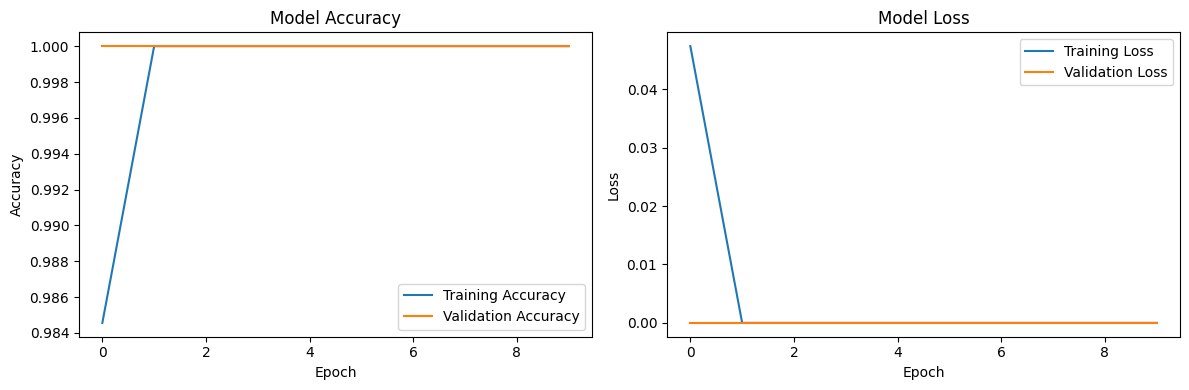

Model saved!


Saving download.jpeg to download.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: Tesla
Confidence: 100.00%


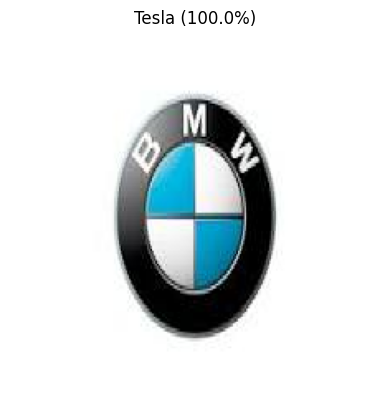

In [4]:
# Car Brand Classifier

!pip install tensorflow kaggle pillow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

print("TensorFlow version:", tf.__version__)


uploaded = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d volkandl/car-brand-logos
!unzip car-brand-logos.zip -d car_data


brands = ['Tesla', 'BMW', 'Toyota', 'Ford', 'Honda']

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    'car_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse', # Changed from 'categorical' to 'sparse'
    subset='training'
)

val_data = datagen.flow_from_directory(
    'car_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse', # Changed from 'categorical' to 'sparse'
    subset='validation'
)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(brands), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # Changed from 'categorical_crossentropy' to 'sparse_categorical_crossentropy'
    metrics=['accuracy']
)

print(model.summary())

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('car_classifier.h5')
print("Model saved!")

from tensorflow.keras.preprocessing import image

def predict_car(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class = brands[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    print(f"Predicted: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")

    plt.imshow(img)
    plt.title(f"{predicted_class} ({confidence:.1f}%)")
    plt.axis('off')
    plt.show()

uploaded = files.upload()
for filename in uploaded.keys():
    predict_car(filename)